# Linear regression

Goals:
- hand-code the linear regression algorithm on toy dataset
- train the algorithm
- estimate the error

## Import basic libraries

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

## Create a toy dataset

In [81]:
N = 100
D = 2

# data is normally distributed with mean data_mu and variance data_sigma
data_mu = .5
data_sigma = 1

# we believe that there is a "true" underlying dependency x2 = true_w * x1 + true_b
# and if some x2 do not land on the line exactly, its due to an error
true_w = 4.5
true_b = 2.5

# error is normally distributed random variable with mean err_mu and variance err_sigma
# that is, the error is sum of many different random influences
err_mu = 0
err_sigma = 0.5

# make up the dataset
data = np.empty([N, D], dtype=float)
data[:, 0] = data_sigma * np.random.randn(N) + data_mu
data[:, 1] = err_sigma * np.random.randn(N) + err_mu # errors
data[:, 1] = data[:, 0] * true_w + true_b + data[:, 1]

# peek into the dataset
data[:5]

array([[ 1.46968151,  8.26871524],
       [-0.12544014,  1.3982057 ],
       [-0.38783065,  1.00991837],
       [ 1.72244575,  9.84476391],
       [ 1.90986439, 11.28809321]])

## Plot the toy dataset

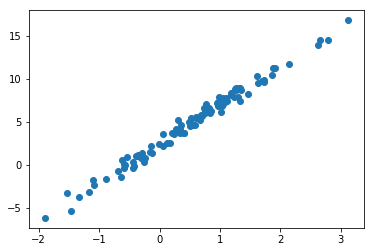

In [82]:
plt.scatter(data[:, 0], data[:, 1])
plt.show()

## Model the relationship

In [83]:
# Our model is: x2 = w * x1 + b

# initial values for w and b
w = 1.0
b = 0.0

# predicts target values according to the model
def predict(X):
    return X * w + b

# predictions
Y = predict(data[:, 0])
Y[:5]

array([ 1.46968151, -0.12544014, -0.38783065,  1.72244575,  1.90986439])

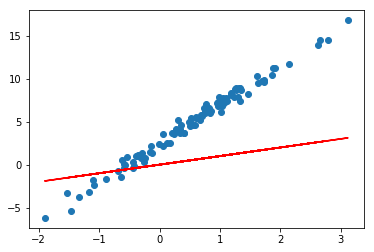

In [84]:
# plot predictions
plt.scatter(data[:, 0], data[:, 1])
plt.plot(data[:, 0], Y, color='red')

In [94]:
# Calculate mean squared error
def mean_squared_error(T, Y):
    return np.square(Y - T).mean()

# error on untrained model
mean_squared_error(data[:, 1], Y)

31.225065877786314

## Train the model

### Split into training set and validation set

In [87]:
X_train = data[:-10, 0]
T_train = data[:-10, 1]

X_test = data[-10:, 0]
T_test = data[-10:, 1]

### Plot the train and test data

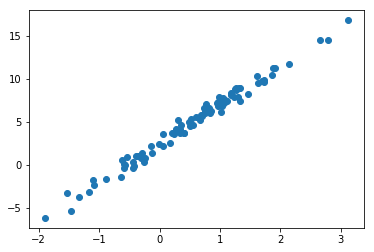

In [89]:
plt.scatter(X_train, T_train)

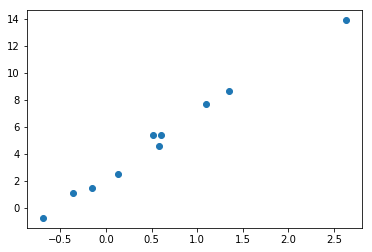

In [90]:
plt.scatter(X_test, T_test)

### Gradient descent

In [121]:
# initial parameters
w = 1.0
b = 0.0

# training rate
alpha = 0.01

# error_delta
err_delta = 0.01

# get starting error
Y_train = predict(X_train)
err_prev = mean_squared_error(T_train, Y_train)

# counter
cnt = 0

while True:
    # print error every 10 steps
    if cnt % 10 == 0:
        print('error: ' + str(err_prev))
    cnt = cnt + 1
    
    # gradient descent
    grad_w = ((Y_train - T_train) * X_train).mean()
    grad_b = (Y_train - T_train).mean()
    w = w - alpha * grad_w
    b = b - alpha * grad_b
    
    # re-evaluate model
    Y_train = predict(X_train)
    err = mean_squared_error(T_train, Y_train)

    # check if trained
    if abs(err - err_prev) < err_delta:
        break
    err_prev = err
    

print('final error: ' + str(err))
print('iterations: ' + str(cnt))

error: 31.380168385399827
error: 22.490891154390987
error: 16.14480134828977
error: 11.614164510642569
error: 8.379502716938386
error: 6.069995976719242
error: 4.420939662281427
error: 3.243376823041343
error: 2.4024211450784927
error: 1.8017834461791982
error: 1.3727263653163615
error: 1.066179977833756
error: 0.8471137381464245
error: 0.6905190320946903
final error: 0.5881273267587065
iterations: 139


### Validate the model

In [119]:
Y_test = predict(X_test)
validation_err = mean_squared_error(T_test, Y_test)
validation_err

0.33802735054702726

### Plot the prediction line

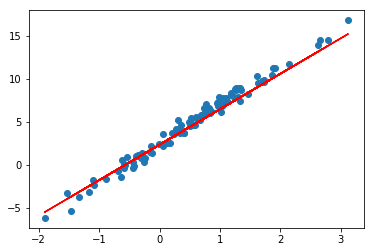

In [120]:
Y = predict(data[:, 0])
plt.scatter(data[:, 0], data[:, 1])
plt.plot(data[:, 0], Y, color='red')

## Conclusions

Gradient descent with learning rate = 0.01 allowed training model in 139 iterations, achieving error of 0.338 on validation set